In [1]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
# my custom data frame intermediate between pandas and pickled data like saved lists
import pkldf as pydf

## find all pkl files in target directory which make up our data set

In [2]:
pkl_test_dir = pydf.PklManager('run_2', pattern='results_*.pkl')

In [3]:
pkl_test_dir.sort(k=lambda x: int(re.search('results_(\d+)', x).group(1)))


In [4]:
# not necessary, but I like to see the files
pkl_test_dir.get_files()

['run_2\\results_1.pkl',
 'run_2\\results_2.pkl',
 'run_2\\results_3.pkl',
 'run_2\\results_4.pkl',
 'run_2\\results_5.pkl',
 'run_2\\results_6.pkl',
 'run_2\\results_7.pkl',
 'run_2\\results_8.pkl',
 'run_2\\results_9.pkl',
 'run_2\\results_10.pkl',
 'run_2\\results_11.pkl',
 'run_2\\results_12.pkl',
 'run_2\\results_13.pkl',
 'run_2\\results_14.pkl',
 'run_2\\results_15.pkl',
 'run_2\\results_16.pkl',
 'run_2\\results_17.pkl',
 'run_2\\results_18.pkl',
 'run_2\\results_19.pkl',
 'run_2\\results_20.pkl',
 'run_2\\results_21.pkl',
 'run_2\\results_22.pkl',
 'run_2\\results_23.pkl',
 'run_2\\results_24.pkl',
 'run_2\\results_25.pkl',
 'run_2\\results_26.pkl',
 'run_2\\results_27.pkl',
 'run_2\\results_28.pkl',
 'run_2\\results_29.pkl']

In [5]:
pkl_test_dir.load_all()

In [6]:
test_df = pkl_test_dir.as_df()
test_df

,results_1,results_2,results_3,results_4,results_5,results_6,results_7,results_8,results_9,results_10,...,results_20,results_21,results_22,results_23,results_24,results_25,results_26,results_27,results_28,results_29
0,5,6,7,6,8,6,8,9,8,8,...,12,12,12,12,12,12,12,12,12,12
1,5,4,5,7,7,8,7,8,10,9,...,12,12,12,12,12,11,12,12,12,12
2,5,6,6,7,7,6,8,8,9,9,...,12,12,12,12,12,12,12,12,12,12
3,5,5,6,6,7,6,8,9,7,9,...,12,12,12,12,12,12,12,12,12,12
4,5,5,6,7,6,7,10,8,8,9,...,11,12,11,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,6,6,6,7,8,7,9,8,8,...,12,12,12,11,12,12,12,12,12,12
99996,5,6,6,6,7,8,9,9,9,10,...,11,12,11,12,12,12,12,12,12,12
99997,5,5,6,8,8,8,7,7,9,8,...,12,12,10,11,11,12,12,12,12,12
99998,5,5,5,8,6,8,7,7,10,9,...,12,12,12,12,12,12,12,12,12,12


In [7]:
# rename columns trial_0, trial_1, etc
test_df.columns = ['trial_' + str(i+1) for i in range(test_df.shape[1])]


looking at a specific tier in the data set over all simulations 

In [8]:
test_df.apply(lambda x: np.mean(x == 12)) 

trial_1     0.00000
trial_2     0.00000
trial_3     0.00000
trial_4     0.00000
trial_5     0.00000
trial_6     0.00000
trial_7     0.00000
trial_8     0.00013
trial_9     0.00172
trial_10    0.00653
trial_11    0.01946
trial_12    0.04461
trial_13    0.08889
trial_14    0.15476
trial_15    0.24000
trial_16    0.34213
trial_17    0.45901
trial_18    0.56788
trial_19    0.67119
trial_20    0.76310
trial_21    0.83893
trial_22    0.89415
trial_23    0.93409
trial_24    0.96132
trial_25    0.97772
trial_26    0.98815
trial_27    0.99423
trial_28    0.99715
trial_29    0.99855
dtype: float64

Getting probability of a tier for each max attempt simulated, a.k.a the distribution of probability over all max attempts

In [9]:
# get the probabilities of each tier for each trial (trial = max attempts for simulation) 
probs = {}
for tier in range(5, 13):
    probs[f'p_of_{tier}'] = test_df.apply(lambda x: np.mean(x == tier))

probs_df = pd.DataFrame(probs)
probs_df

,p_of_5,p_of_6,p_of_7,p_of_8,p_of_9,p_of_10,p_of_11,p_of_12
trial_1,0.70206,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
trial_2,0.51846,0.42172,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
trial_3,0.23381,0.55154,0.20883,0.00000,0.00000,0.00000,0.00000,0.00000
trial_4,0.07487,0.42081,0.41993,0.08439,0.00000,0.00000,0.00000,0.00000
trial_5,0.01676,0.23256,0.48591,0.23945,0.02532,0.00000,0.00000,0.00000
trial_6,0.00281,0.10159,0.40538,0.38664,0.09863,0.00495,0.00000,0.00000
trial_7,0.00029,0.03440,0.27276,0.45249,0.21285,0.02605,0.00116,0.00000
trial_8,0.00004,0.01023,0.15318,0.42740,0.33225,0.07050,0.00627,0.00013
trial_9,0.00000,0.00243,0.07228,0.33773,0.41812,0.14584,0.02188,0.00172
trial_10,0.00000,0.00032,0.03029,0.23239,0.44775,0.22950,0.05322,0.00653


sanity check of the probabilities on trial_8, which is the first simulation where its possible to reach tier 12; must be sum = 1.0

In [10]:
probs_df.loc['trial_8'].sum()

1.0

Graphing the distribution of probability over all max attempts for all tiers in the simulation data

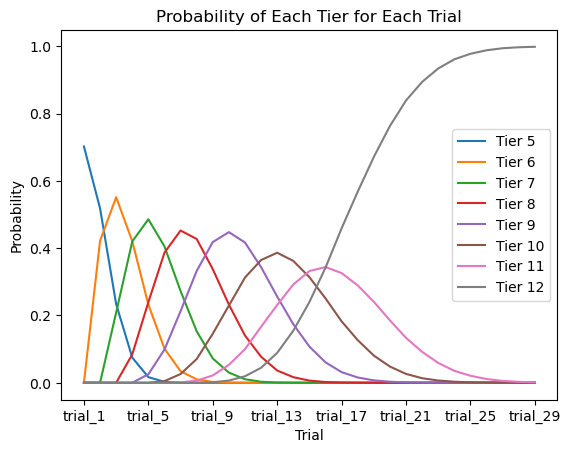

In [11]:
for tier in range(5, 13):
    plt.plot(probs_df.index, probs_df[f'p_of_{tier}'], label=f'Tier {tier}')
# 
# make x axis labels properly spaced and legible
xticks = np.arange(0, len(probs_df.index), step=4)  # adjust the step to change the spacing between labels
plt.xticks(xticks)
plt.xlabel('Trial')
plt.ylabel('Probability')
plt.title('Probability of Each Tier for Each Trial')
plt.legend()
plt.show()

In [12]:
test_df.trial_8.value_counts()

8     42740
9     33225
7     15318
10     7050
6      1023
11      627
12       13
5         4
Name: trial_8, dtype: int64

<AxesSubplot:>

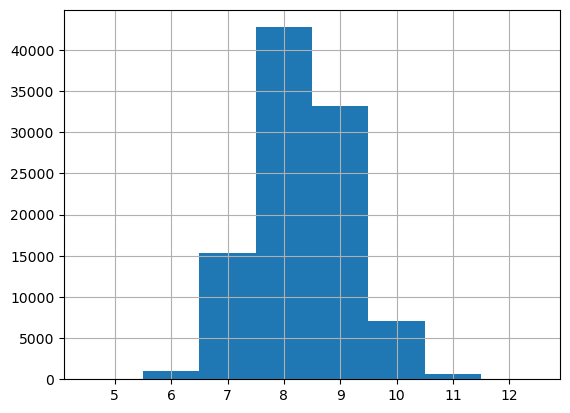

In [13]:
# graph the results
test_df.trial_8.hist(bins=range(5, 14), align='left')

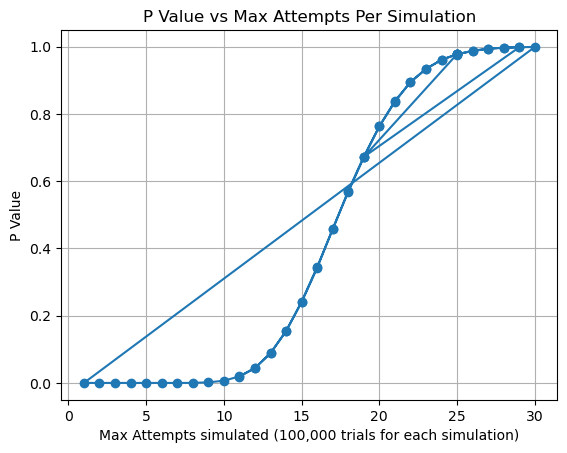

In [43]:
# parse & graph the markdown file for p values of specific tier

# Open and read the markdown file
with open('sim_results.txt', 'r') as f:
    content = f.read()

# Use regular expressions to find all max attempts and p values
max_attempts = re.findall(r'max attempts per iteration: (\d+)', content)
p_values = re.findall(r'p = (\d+\.\d+)', content)

# Convert to integers and floats
max_attempts = [int(x) for x in max_attempts]
p_values = [float(x) for x in p_values]

# Create the plot
plt.plot(max_attempts, p_values, marker='o')
plt.xlabel('Max Attempts simulated (100,000 trials for each simulation)')
plt.ylabel('P Value')
plt.title('P Value vs Max Attempts Per Simulation')
plt.grid(True)
plt.show()

In [14]:
pkl_dir = pydf.PklManager('', pattern='2d_list.pkl')
pkl_dir.load_all()
df = pkl_dir.as_df()
df

,0,1,2
0,0,1,2
1,0,1,2
2,0,1,2
